In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

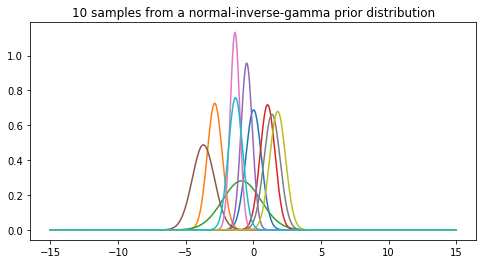

In [26]:
# For in class activity

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        stats.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        stats.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    sigma2 = stats.invgamma.rvs(a=alpha, scale=beta, size=size)  # Sample sigma^2 from the inverse-gamma
    x = stats.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)  # Sample x from the normal
    return np.vstack((x, sigma2)).transpose()

# Normal-inverse-gamma prior hyperparameters
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4

num_samples = 10
samples = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=num_samples)

plt.figure(figsize=(8, 4))
x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    y = stats.norm.pdf(x, loc=samples[i, 0], scale=np.sqrt(samples[i, 1]))
    plt.plot(x, y)
plt.title('%i samples from a normal-inverse-gamma prior distribution' % num_samples)
plt.show()

## Choosing hyperparameters

Ideal NIG:

$$E_{ideal}[\mu] = 2.3$$
$$SD_{ideal}[\mu] = 0.5$$

$$E_{ideal}[\sigma^2] = 2.75$$
$$SD_{ideal}[\sigma^2] = 1$$

Our NIG:

$$E[\mu] = \mu$$
$$Var[\mu] = \frac{\beta}{(\alpha-1)\lambda}, \text{for}  a>1$$
$$SD[\mu] = \sqrt{\frac{\beta}{(\alpha-1)\lambda}}$$

$$E[\sigma^2] = \frac{\beta}{(\alpha-1)}, \text{for}  a>1$$
$$Var[\sigma^2] = \frac{\beta^2}{(\alpha-1)^2(\alpha-2)}, \text{for} a>2$$
$$SD[\sigma^2] = \sqrt{\frac{\beta^2}{(\alpha-1)^2(\alpha-2)}} = \frac{\beta}{(\alpha-1)\sqrt{(\alpha-2)}}$$

To find the optimal values for our hyperparameters, we need to minimize the function:
$$(E_{ideal}[\mu]-E[\mu])^2 + (SD_{ideal}[\mu]-SD[\mu])^2 + (E_{ideal}[\sigma^2]-E[\sigma^2])^2 + (SD_{ideal}[\sigma^2] - SD[\sigma^2])^2$$

$$(2.3-E[\mu])^2 + (0.5-SD[\mu])^2 + (2.75-E[\sigma^2])^2 + (1 - SD[\sigma^2])^2$$

In [9]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def f(x): #need to pass x (alpha, beta, mu, lamda)
    return (2.3-x[2])**2 + (0.5-(x[1]/((x[0]-1)*x[3]))) +(x[1]/(x[0]-1))**2 + (x[1]/(((x[0]-1))*((x[0]-2)**(1/2.0))))**2

x_initial = np.array([2.1, 1, 1, 1])
result = minimize(f, x_initial)
x_final = result.x
print('Started at', x_initial)
print('Ended at', x_final)
print('f(%s) = %.6f' % (x_final, f(x_final)))

Started at [2.1 1.  1.  1. ]
Ended at [3.0769783  0.72510545 2.34511479 0.78366508]
f([3.0769783  0.72510545 2.34511479 0.78366508]) = 0.291596
